In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_parquet('green_tripdata_2022-11.parquet')
df.shape

(62313, 20)

In [23]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-11-01 00:28:37,2022-11-01 00:31:56,N,1.0,223,223,1.0,0.71,4.5,0.5,0.5,1.45,0.0,None,0.3,7.25,1.0,1.0,0.00
1,2,2022-11-01 00:51:02,2022-11-01 01:12:50,N,5.0,80,90,2.0,6.86,45.0,0.0,0.0,9.61,0.0,None,0.3,57.66,1.0,2.0,2.75
2,2,2022-11-01 00:51:50,2022-11-01 00:55:38,N,1.0,244,244,2.0,0.58,4.5,0.5,0.5,0.00,0.0,None,0.3,5.80,2.0,1.0,0.00
3,2,2022-11-01 00:03:32,2022-11-01 00:12:28,N,1.0,116,74,1.0,2.74,10.5,0.5,0.5,0.00,0.0,None,0.3,11.80,2.0,1.0,0.00
4,2,2022-11-01 00:17:46,2022-11-01 00:22:03,N,1.0,134,134,1.0,0.91,5.0,0.5,0.5,1.58,0.0,None,0.3,7.88,1.0,1.0,0.00


### Calculate the trip duration in minutes

In [ ]:
df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)

In [28]:
df['trip_duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
df.trip_duration = df.trip_duration.apply(lambda td: td.total_seconds()/ 60)

In [30]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration
0,2,2022-11-01 00:28:37,2022-11-01 00:31:56,N,1.0,223,223,1.0,0.71,4.5,...,0.5,1.45,0.0,None,0.3,7.25,1.0,1.0,0.00,3.316667
1,2,2022-11-01 00:51:02,2022-11-01 01:12:50,N,5.0,80,90,2.0,6.86,45.0,...,0.0,9.61,0.0,None,0.3,57.66,1.0,2.0,2.75,21.800000
2,2,2022-11-01 00:51:50,2022-11-01 00:55:38,N,1.0,244,244,2.0,0.58,4.5,...,0.5,0.00,0.0,None,0.3,5.80,2.0,1.0,0.00,3.800000
3,2,2022-11-01 00:03:32,2022-11-01 00:12:28,N,1.0,116,74,1.0,2.74,10.5,...,0.5,0.00,0.0,None,0.3,11.80,2.0,1.0,0.00,8.933333
4,2,2022-11-01 00:17:46,2022-11-01 00:22:03,N,1.0,134,134,1.0,0.91,5.0,...,0.5,1.58,0.0,None,0.3,7.88,1.0,1.0,0.00,4.283333


In [31]:
# let's check unique values
columns=df.columns
for col in columns:
    print(col,':\n',df[col].unique())
    print(df[col].value_counts())
    print('\n',20*'**','\n')

VendorID :
 [2 1]
2    55432
1     6881
Name: VendorID, dtype: int64

 **************************************** 

lpep_pickup_datetime :
 ['2022-11-01T00:28:37.000000000' '2022-11-01T00:51:02.000000000'
 '2022-11-01T00:51:50.000000000' ... '2022-11-30T23:27:00.000000000'
 '2022-11-30T23:29:00.000000000' '2022-11-30T23:05:00.000000000']
2022-11-11 19:59:00    5
2022-11-18 19:17:11    4
2022-11-17 07:50:00    4
2022-11-18 13:10:00    4
2022-11-01 16:00:47    3
                      ..
2022-11-11 09:43:51    1
2022-11-11 09:59:33    1
2022-11-11 09:06:33    1
2022-11-11 09:15:48    1
2022-11-16 21:32:58    1
Name: lpep_pickup_datetime, Length: 60547, dtype: int64

 **************************************** 

lpep_dropoff_datetime :
 ['2022-11-01T00:31:56.000000000' '2022-11-01T01:12:50.000000000'
 '2022-11-01T00:55:38.000000000' ... '2022-11-30T23:46:00.000000000'
 '2022-11-30T23:30:00.000000000' '2022-11-30T23:23:00.000000000']
2022-11-11 18:55:00    6
2022-11-13 00:00:00    5
2022-11-03 

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62313 entries, 0 to 62312
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               62313 non-null  int64         
 1   lpep_pickup_datetime   62313 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  62313 non-null  datetime64[ns]
 3   store_and_fwd_flag     56192 non-null  object        
 4   RatecodeID             56192 non-null  float64       
 5   PULocationID           62313 non-null  int64         
 6   DOLocationID           62313 non-null  int64         
 7   passenger_count        56192 non-null  float64       
 8   trip_distance          62313 non-null  float64       
 9   fare_amount            62313 non-null  float64       
 10  extra                  62313 non-null  float64       
 11  mta_tax                62313 non-null  float64       
 12  tip_amount             62313 non-null  float64       
 13  t

In [33]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       'trip_duration'],
      dtype='object')

In [34]:
df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration
count,62313.000000,56192.000000,62313.000000,62313.000000,56192.000000,62313.000000,62313.000000,62313.000000,62313.000000,62313.000000,62313.000000,62313.000000,62313.000000,56192.000000,56192.000000,56192.000000,62313.000000
mean,1.889574,1.240408,98.757659,139.787797,1.307179,83.301308,14.990903,0.339127,0.422921,2.014565,0.218133,0.297574,18.976286,1.352007,1.052267,0.763583,20.966591
std,0.313423,0.940917,62.278566,76.824984,0.960456,3374.500924,18.093849,0.620629,0.183723,2.766108,1.285773,0.034413,19.341514,0.502619,0.222567,1.231793,81.733241
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-100.000000,-4.500000,-0.500000,-1.160000,0.000000,-0.300000,-100.300000,1.000000,1.000000,-2.750000,-54.016667
25%,2.000000,1.000000,66.000000,74.000000,1.000000,1.180000,7.500000,0.000000,0.500000,0.000000,0.000000,0.300000,10.300000,1.000000,1.000000,0.000000,7.716667
50%,2.000000,1.000000,75.000000,138.000000,1.000000,2.010000,11.000000,0.000000,0.500000,1.560000,0.000000,0.300000,14.760000,1.000000,1.000000,0.000000,12.316667
75%,2.000000,1.000000,130.000000,223.000000,1.000000,3.650000,17.500000,0.500000,0.500000,3.000000,0.000000,0.300000,22.110000,2.000000,1.000000,2.750000,19.666667
max,2.000000,6.000000,265.000000,265.000000,9.000000,241021.090000,2020.200000,4.500000,0.500000,110.880000,73.750000,0.300000,2021.000000,5.000000,2.000000,2.750000,1439.816667


array([[<AxesSubplot:title={'center':'VendorID'}>,
        <AxesSubplot:title={'center':'lpep_pickup_datetime'}>,
        <AxesSubplot:title={'center':'lpep_dropoff_datetime'}>,
        <AxesSubplot:title={'center':'RatecodeID'}>],
       [<AxesSubplot:title={'center':'PULocationID'}>,
        <AxesSubplot:title={'center':'DOLocationID'}>,
        <AxesSubplot:title={'center':'passenger_count'}>,
        <AxesSubplot:title={'center':'trip_distance'}>],
       [<AxesSubplot:title={'center':'fare_amount'}>,
        <AxesSubplot:title={'center':'extra'}>,
        <AxesSubplot:title={'center':'mta_tax'}>,
        <AxesSubplot:title={'center':'tip_amount'}>],
       [<AxesSubplot:title={'center':'tolls_amount'}>,
        <AxesSubplot:title={'center':'improvement_surcharge'}>,
        <AxesSubplot:title={'center':'total_amount'}>,
        <AxesSubplot:title={'center':'payment_type'}>],
       [<AxesSubplot:title={'center':'trip_type'}>,
        <AxesSubplot:title={'center':'congestion_surcha

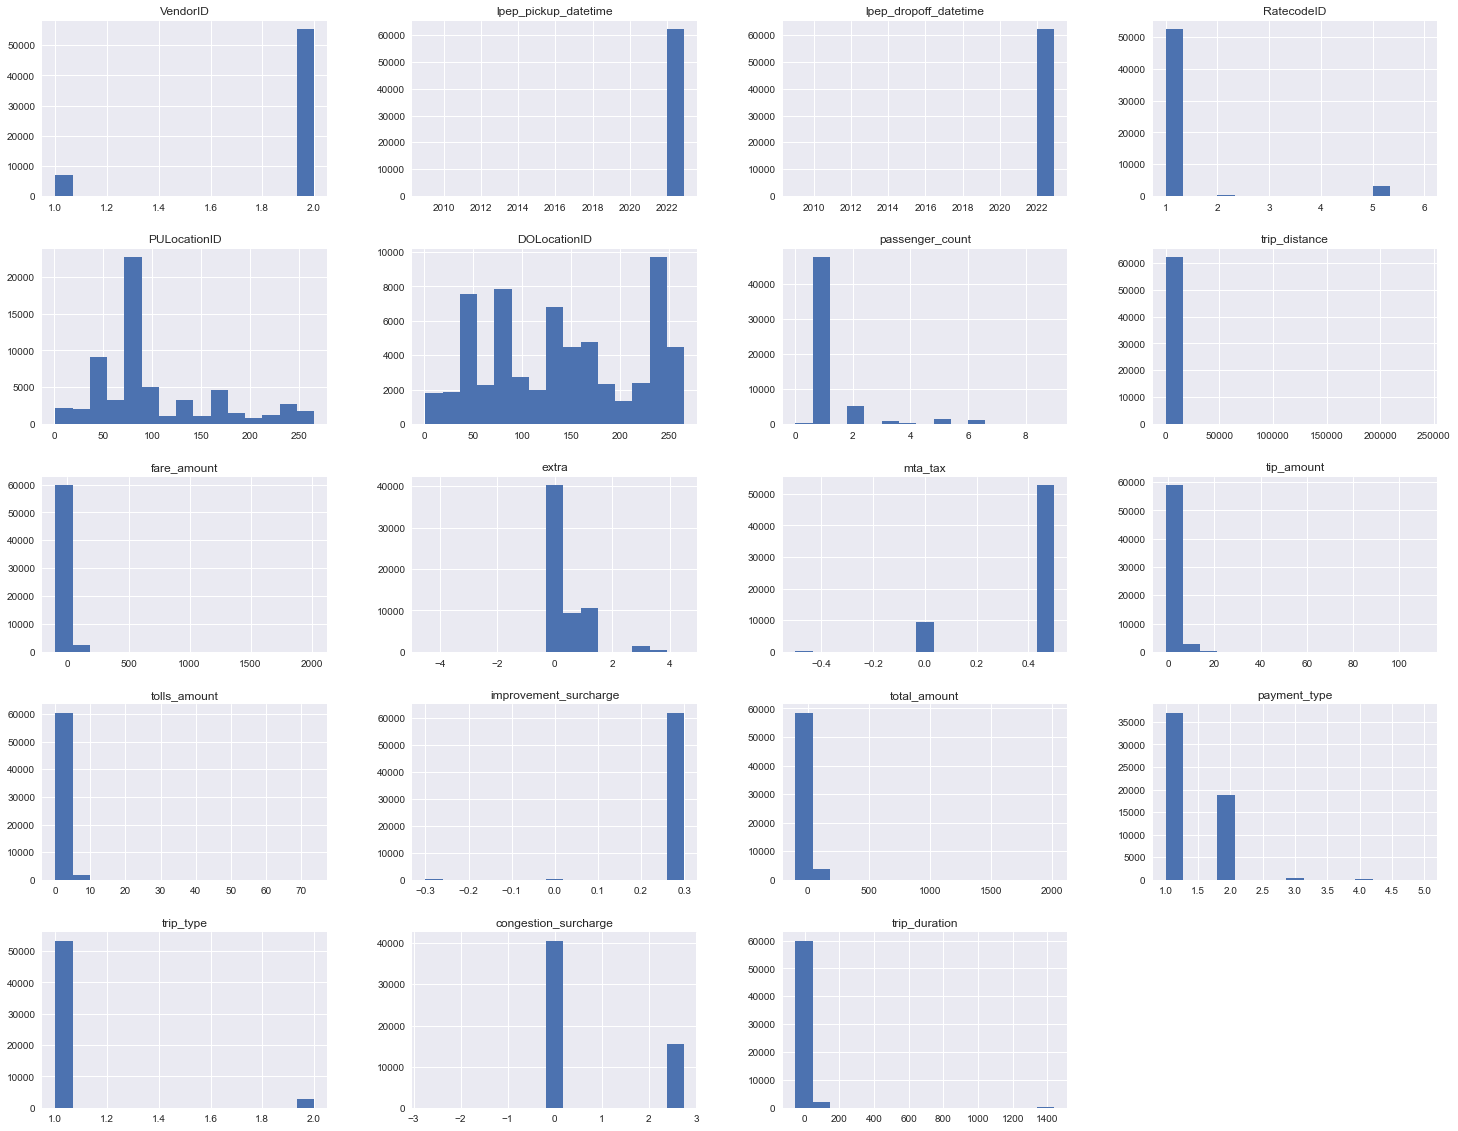

In [35]:
plt.style.use("seaborn")
df.hist(figsize=(25,20), bins=15)

In [38]:
df['VendorID'].unique()

array([2, 1], dtype=int64)

In [39]:
df['VendorID'].value_counts()

2    55432
1     6881
Name: VendorID, dtype: int64

<AxesSubplot:xlabel='VendorID', ylabel='count'>

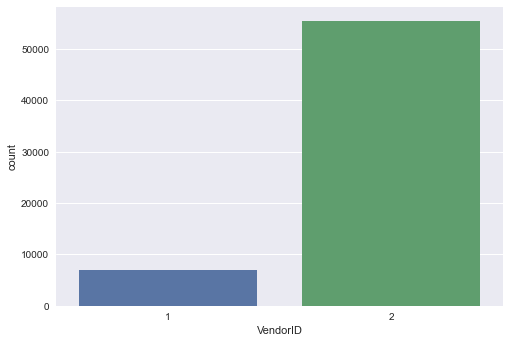

In [40]:
sns.countplot(x="VendorID", data=df)

<AxesSubplot:ylabel='VendorID'>

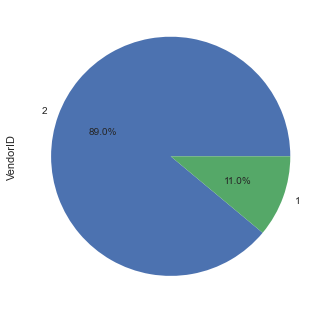

In [41]:
df['VendorID'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [42]:
df['trip_type'].unique()

array([ 1.,  2., nan])

In [43]:
df['trip_type'].value_counts()

1.0    53255
2.0     2937
Name: trip_type, dtype: int64

<AxesSubplot:xlabel='trip_type', ylabel='count'>

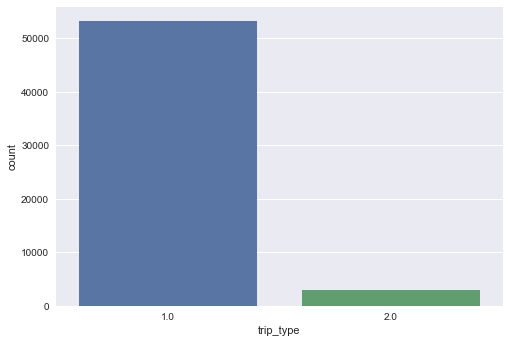

In [44]:
sns.countplot(x="trip_type", data=df)

<AxesSubplot:ylabel='trip_type'>

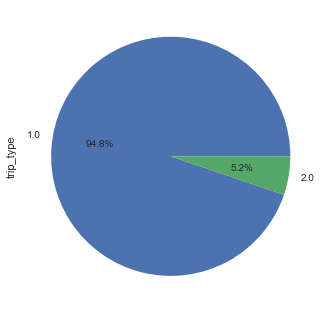

In [45]:
df['trip_type'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [46]:
df['improvement_surcharge'].unique()

array([ 0.3, -0.3,  0. ])

In [47]:
df['improvement_surcharge'].value_counts()

 0.3    61969
 0.0      184
-0.3      160
Name: improvement_surcharge, dtype: int64

<AxesSubplot:xlabel='improvement_surcharge', ylabel='count'>

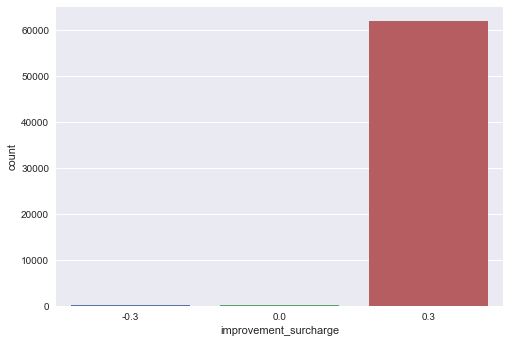

In [48]:
sns.countplot(x='improvement_surcharge', data=df)

<AxesSubplot:ylabel='improvement_surcharge'>

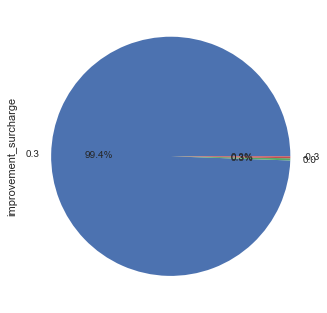

In [49]:
df['improvement_surcharge'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [50]:
df['payment_type'].unique()

array([ 1.,  2.,  3.,  4.,  5., nan])

In [51]:
df['payment_type'].value_counts()

1.0    36999
2.0    18707
3.0      386
4.0       99
5.0        1
Name: payment_type, dtype: int64

<AxesSubplot:xlabel='payment_type', ylabel='count'>

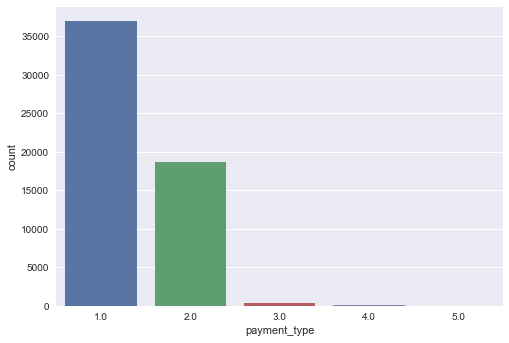

In [52]:
sns.countplot(x='payment_type', data=df)

<AxesSubplot:ylabel='payment_type'>

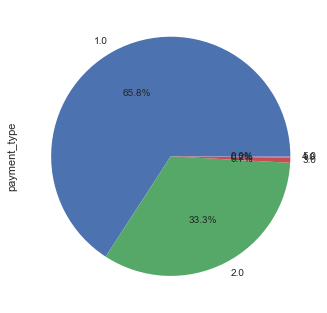

In [53]:
df['payment_type'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [54]:
df['store_and_fwd_flag'].unique()

array(['N', 'Y', None], dtype=object)

In [56]:
df['store_and_fwd_flag'].value_counts()

N    55916
Y      276
Name: store_and_fwd_flag, dtype: int64

<AxesSubplot:xlabel='store_and_fwd_flag', ylabel='count'>

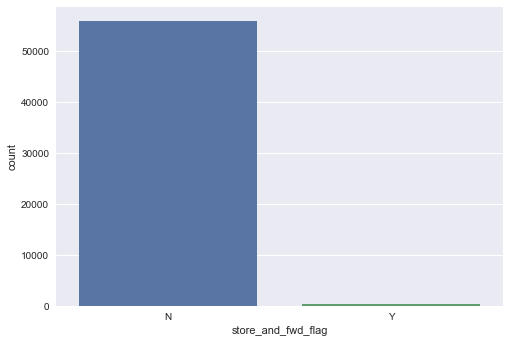

In [57]:
sns.countplot(x="store_and_fwd_flag", data=df)

<AxesSubplot:ylabel='store_and_fwd_flag'>

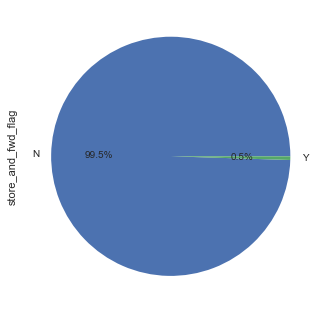

In [58]:
df['store_and_fwd_flag'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [59]:
df['mta_tax'].unique()

array([ 0.5,  0. , -0.5])

In [60]:
df['mta_tax'].value_counts()

 0.5    52851
 0.0     9318
-0.5      144
Name: mta_tax, dtype: int64

<AxesSubplot:xlabel='mta_tax', ylabel='count'>

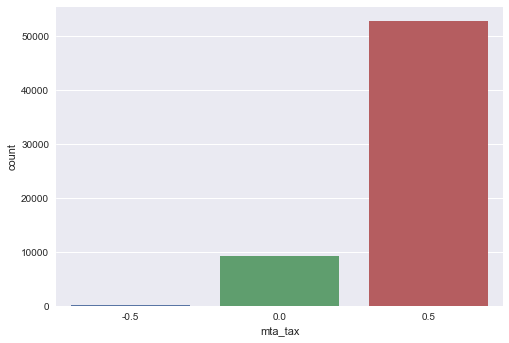

In [61]:
sns.countplot(x="mta_tax", data=df)

<AxesSubplot:ylabel='mta_tax'>

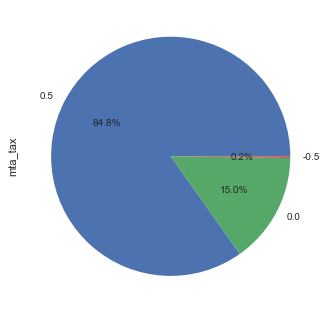

In [62]:
df['mta_tax'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [63]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration
0,2,2022-11-01 00:28:37,2022-11-01 00:31:56,N,1.0,223,223,1.0,0.71,4.5,...,0.5,1.45,0.0,None,0.3,7.25,1.0,1.0,0.00,3.316667
1,2,2022-11-01 00:51:02,2022-11-01 01:12:50,N,5.0,80,90,2.0,6.86,45.0,...,0.0,9.61,0.0,None,0.3,57.66,1.0,2.0,2.75,21.800000
2,2,2022-11-01 00:51:50,2022-11-01 00:55:38,N,1.0,244,244,2.0,0.58,4.5,...,0.5,0.00,0.0,None,0.3,5.80,2.0,1.0,0.00,3.800000
3,2,2022-11-01 00:03:32,2022-11-01 00:12:28,N,1.0,116,74,1.0,2.74,10.5,...,0.5,0.00,0.0,None,0.3,11.80,2.0,1.0,0.00,8.933333
4,2,2022-11-01 00:17:46,2022-11-01 00:22:03,N,1.0,134,134,1.0,0.91,5.0,...,0.5,1.58,0.0,None,0.3,7.88,1.0,1.0,0.00,4.283333


In [65]:
df['year'] = df['lpep_pickup_datetime'].dt.year
df['month'] = df['lpep_pickup_datetime'].dt.month
df['day'] = df['lpep_pickup_datetime'].dt.day
df['weekday'] = df['lpep_pickup_datetime'].dt.day_name()
display(df.head())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration,year,month,day,weekday
0,2,2022-11-01 00:28:37,2022-11-01 00:31:56,N,1.0,223,223,1.0,0.71,4.5,...,0.3,7.25,1.0,1.0,0.00,3.316667,2022,11,1,Tuesday
1,2,2022-11-01 00:51:02,2022-11-01 01:12:50,N,5.0,80,90,2.0,6.86,45.0,...,0.3,57.66,1.0,2.0,2.75,21.800000,2022,11,1,Tuesday
2,2,2022-11-01 00:51:50,2022-11-01 00:55:38,N,1.0,244,244,2.0,0.58,4.5,...,0.3,5.80,2.0,1.0,0.00,3.800000,2022,11,1,Tuesday
3,2,2022-11-01 00:03:32,2022-11-01 00:12:28,N,1.0,116,74,1.0,2.74,10.5,...,0.3,11.80,2.0,1.0,0.00,8.933333,2022,11,1,Tuesday
4,2,2022-11-01 00:17:46,2022-11-01 00:22:03,N,1.0,134,134,1.0,0.91,5.0,...,0.3,7.88,1.0,1.0,0.00,4.283333,2022,11,1,Tuesday


In [66]:
df.groupby('store_and_fwd_flag').agg({'VendorID':'count'}).reset_index()

,store_and_fwd_flag,VendorID
0,N,55916
1,Y,276


weekday
Friday        8670
Monday        8465
Saturday      7603
Sunday        6373
Thursday      8568
Tuesday      11095
Wednesday    11539
Name: VendorID, dtype: int64


<AxesSubplot:xlabel='weekday', ylabel='Count'>

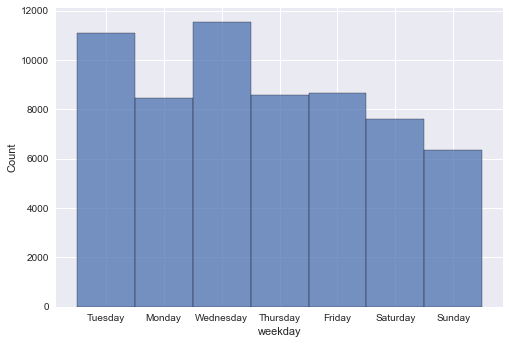

In [67]:
print(df.groupby('weekday')['VendorID'].count())

sns.histplot(df['weekday'])

In [68]:
df['hour'] = df.lpep_pickup_datetime.dt.hour
df['minute'] = df.lpep_pickup_datetime.dt.minute
df['seconds'] = df.lpep_pickup_datetime.dt.second

In [69]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_type,congestion_surcharge,trip_duration,year,month,day,weekday,hour,minute,seconds
0,2,2022-11-01 00:28:37,2022-11-01 00:31:56,N,1.0,223,223,1.0,0.71,4.5,...,1.0,0.00,3.316667,2022,11,1,Tuesday,0,28,37
1,2,2022-11-01 00:51:02,2022-11-01 01:12:50,N,5.0,80,90,2.0,6.86,45.0,...,2.0,2.75,21.800000,2022,11,1,Tuesday,0,51,2
2,2,2022-11-01 00:51:50,2022-11-01 00:55:38,N,1.0,244,244,2.0,0.58,4.5,...,1.0,0.00,3.800000,2022,11,1,Tuesday,0,51,50
3,2,2022-11-01 00:03:32,2022-11-01 00:12:28,N,1.0,116,74,1.0,2.74,10.5,...,1.0,0.00,8.933333,2022,11,1,Tuesday,0,3,32
4,2,2022-11-01 00:17:46,2022-11-01 00:22:03,N,1.0,134,134,1.0,0.91,5.0,...,1.0,0.00,4.283333,2022,11,1,Tuesday,0,17,46


In [9]:
num_cols = [num for num in df.columns if df[num].dtype in ('float','int')]
print(num_cols)

['RatecodeID', 'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge']


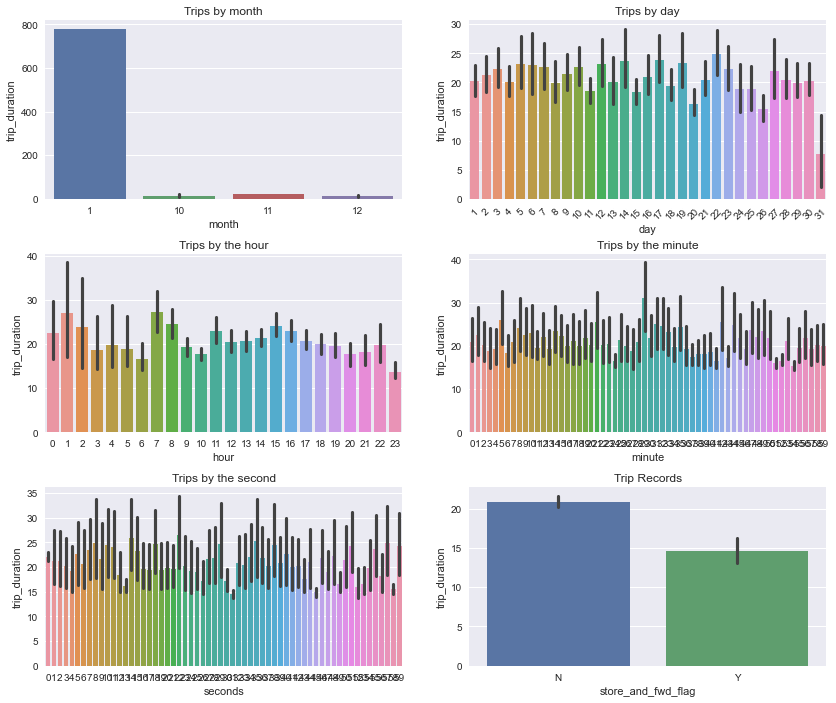

In [70]:
figure, axes = plt.subplots(nrows=3, ncols=2)
plt.tight_layout()
figure.set_size_inches(12,10)


sns.barplot(x='month', y='trip_duration', data=df, ax=axes[0,0])
sns.barplot(x='day', y='trip_duration', data=df, ax=axes[0,1])
sns.barplot(x='hour', y='trip_duration', data=df, ax=axes[1,0])
sns.barplot(x='minute', y='trip_duration', data=df, ax=axes[1,1])
sns.barplot(x='seconds', y='trip_duration', data=df, ax=axes[2,0])
sns.barplot(x='store_and_fwd_flag', y='trip_duration', data=df, ax=axes[2,1])

axes[0,0].set(title='Trips by month')
axes[0,1].set(title='Trips by day')
axes[1,0].set(title='Trips by the hour')
axes[1,1].set(title='Trips by the minute')
axes[2,0].set(title='Trips by the second')
axes[2,1].set(title='Trip Records')

axes[1,0].tick_params(axis='x', labelrotation=0)
axes[0,1].tick_params(axis='x', labelrotation=45)

<AxesSubplot:xlabel='trip_distance', ylabel='trip_duration'>

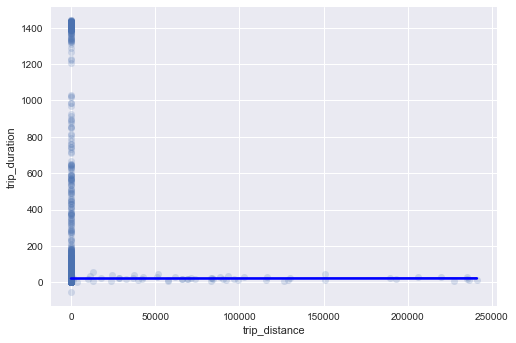

In [72]:
sns.regplot(x='trip_distance', y='trip_duration', data=df, 
            scatter_kws={'alpha':0.2}, line_kws={'color': 'blue'})

In [83]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_type,congestion_surcharge,trip_duration,year,month,day,weekday,hour,minute,seconds
0,2,2022-11-01 00:28:37,2022-11-01 00:31:56,0,1.0,223,223,1.0,0.71,4.5,...,1.0,0.00,3.316667,2022,11,1,5,0,28,37
1,2,2022-11-01 00:51:02,2022-11-01 01:12:50,0,5.0,80,90,2.0,6.86,45.0,...,2.0,2.75,21.800000,2022,11,1,5,0,51,2
2,2,2022-11-01 00:51:50,2022-11-01 00:55:38,0,1.0,244,244,2.0,0.58,4.5,...,1.0,0.00,3.800000,2022,11,1,5,0,51,50
3,2,2022-11-01 00:03:32,2022-11-01 00:12:28,0,1.0,116,74,1.0,2.74,10.5,...,1.0,0.00,8.933333,2022,11,1,5,0,3,32
4,2,2022-11-01 00:17:46,2022-11-01 00:22:03,0,1.0,134,134,1.0,0.91,5.0,...,1.0,0.00,4.283333,2022,11,1,5,0,17,46


In [76]:
Lb = LabelEncoder()

In [77]:
df['store_and_fwd_flag']  = Lb.fit_transform(df['store_and_fwd_flag'])
df['ehail_fee']  = Lb.fit_transform(df['ehail_fee'])
df['weekday']  = Lb.fit_transform(df['weekday'])

In [81]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag                int32
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                         int32
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
trip_duration                   float64
year                              int64
month                             int64
day                               int64
weekday                           int32


In [84]:
df.drop('year', axis=1, inplace=True)

In [85]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,payment_type,trip_type,congestion_surcharge,trip_duration,month,day,weekday,hour,minute,seconds
0,2,2022-11-01 00:28:37,2022-11-01 00:31:56,0,1.0,223,223,1.0,0.71,4.5,...,1.0,1.0,0.00,3.316667,11,1,5,0,28,37
1,2,2022-11-01 00:51:02,2022-11-01 01:12:50,0,5.0,80,90,2.0,6.86,45.0,...,1.0,2.0,2.75,21.800000,11,1,5,0,51,2
2,2,2022-11-01 00:51:50,2022-11-01 00:55:38,0,1.0,244,244,2.0,0.58,4.5,...,2.0,1.0,0.00,3.800000,11,1,5,0,51,50
3,2,2022-11-01 00:03:32,2022-11-01 00:12:28,0,1.0,116,74,1.0,2.74,10.5,...,2.0,1.0,0.00,8.933333,11,1,5,0,3,32
4,2,2022-11-01 00:17:46,2022-11-01 00:22:03,0,1.0,134,134,1.0,0.91,5.0,...,1.0,1.0,0.00,4.283333,11,1,5,0,17,46


In [68]:
df["store_and_fwd_flag"]=df["store_and_fwd_flag"].fillna(df["store_and_fwd_flag"].median())
df["RatecodeID"]=df["RatecodeID"].fillna(df["RatecodeID"].median())
df["passenger_count"]=df["passenger_count"].fillna(df["passenger_count"].median())
df["ehail_fee"]=df["ehail_fee"].fillna(df["ehail_fee"].median())
df["payment_type"]=df["payment_type"].fillna(df["payment_type"].median())
df["trip_type"]=df["trip_type"].fillna(df["trip_type"].median())
df["congestion_surcharge"]=df["congestion_surcharge"].fillna(df["congestion_surcharge"].median())

In [82]:
df.isna().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag          0
RatecodeID               6121
PULocationID                0
DOLocationID                0
passenger_count          6121
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
ehail_fee                   0
improvement_surcharge       0
total_amount                0
payment_type             6121
trip_type                6121
congestion_surcharge     6121
trip_duration               0
year                        0
month                       0
day                         0
weekday                     0
hour                        0
minute                      0
seconds                     0
dtype: int64